In [1]:
import spacy
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay

from FakeNews.Tokenizer import Tokenizer
from FakeNews.Data import Data
from FakeNews.Cleaner import Cleaner
from FakeNews.Filter import Filter
from FakeNews.Lemmatizer import Lemmatizer
from FakeNews.Predictor import Predictor
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [2]:
cleaner = Cleaner()
#pp = Pipeline([('tokenizing', Tokenizer()),
              #('filtering', Filter()),
              #('lemmatizing', Lemmatizer())])


In [3]:
pipelines = {}

In [4]:
pipelines['svc'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                   ('text', TfidfVectorizer(), 1)])),
                ('pca', PCA()),
                ('svc', SVC())])

In [5]:
pipelines['svc_nmf'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                    ('text', TfidfVectorizer(), 1)])),
                 ('nmf', PCA()),
                 ('svc', SVC())])

In [6]:
pipelines['kmeans'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                      ('text', TfidfVectorizer(), 1)])),
                   ('pca', PCA()),
                   ('kmeans', KMeans(n_clusters=2, random_state=27)),
                   ('predicting', Predictor())])

In [7]:
pipelines['kmeans_nmf'] = Pipeline([('vectorizing', ColumnTransformer([('title', TfidfVectorizer(), 0),
                                                                   ('text', TfidfVectorizer(), 1)])),
                                ('nmf', NMF()),
                                ('kmeans', KMeans(n_clusters=2, random_state=27)),
                                ('predicting', Predictor())])

In [8]:
data = Data()
data.load()
cleaner.fit(data.X)
data.X = cleaner.transform(data.X)
data.y = cleaner.transform(data.y)

Cleaning...
Cleaning...


In [9]:
data.X

array([['As U.S. budget fight looms, Republicans flip their fiscal script',
        'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportiona

In [10]:
X_train, X_test, y_train, y_test = tts(data.X,
                                       data.y,
                                       train_size = .25,
                                       test_size = .25,
                                       random_state = 42)

In [11]:
X_train50, X_test50, y_train50, y_test50 = tts(data.X,
                                               data.y,
                                               train_size = .5,
                                               test_size = .5,
                                               random_state = 42)

In [12]:
X_train

array([['Italy rescues more than 250 migrants in Mediterranean',
        'ROME (Reuters) - More than 250 migrants were rescued in the central Mediterranean during the night between Monday and Tuesday, Italy s Coast Guard said. A statement said the migrants, in one large rubber dinghy and two small boats, were rescued in three missions by two ships, one from a non-governmental organization. Migrant arrivals to Italy have fallen by two-thirds year on year since July after officials working for the U.N.-backed government in Tripoli put pressure on people smugglers in the Libyan city of Sabratha to stop boats leaving. Italy is also bolstering the Libyan coast guard s ability to turn back boats. Last week, the United Nations began bringing African refugees to Italy from Libya, evacuating them from detention centers whose conditions have been condemned by rights groups as inhumane.  ',
        'worldnews', 'December 26, 2017 '],
       ['RACIST RANT From Supreme Court Justice Exposes Slanted

In [13]:
#X_train = pp.fit_transform(X_train)

In [14]:

#X_train50 = pp.fit_transform(X_train50)


In [15]:
X_train50

array([['BERNIE SANDERS’ ECONOMIC POLICY Explained In One BRUTAL Meme',
        'This is the economic policy that s bringing throngs of college-age young adults to rally for Bernie Sanders.It s a sad but true commentary on the generation of  adults  who will be leading our nation in the years to come. Note to college students, this is what mature bill-paying adults call  B.S. economics. ',
        'left-news', 'Feb 3, 2016'],
       [' Elizabeth Warren BURIES Trump After He Throws Temper Tantrum Over Her Attacks',
        'Donald Trump and Elizabeth Warren are engaged in a Twitter feud for the ages and she s kicking his ass.On Saturday, the Massachusetts Senator ripped the Republican nominee to shreds for picking Indiana Governor Mike Pence as his running mate on the 2016 ticket..@realDonaldTrump & @mike_pence are a perfect match: Two small, insecure, weak men who use hate & fear to divide our country & our people.  Elizabeth Warren (@elizabethforma) July 16, 2016 Of COURSE @realDonald

In [16]:
param_grids = {key: {} for key in pipelines.keys()}

In [17]:
gcvs = {key: None for key in pipelines.keys()}

In [105]:
param_grids['svc'] = {}
param_grids['svc']['vectorizing__title__lowercase'] = [True, False]
param_grids['svc']['vectorizing__title__max_features'] = [150, 175, 200]
param_grids['svc']['vectorizing__text__max_features'] = [125, 150, 175]
param_grids['svc']['vectorizing__title__ngram_range'] = [(1,1),(1,2)]#[(1,3),(1, 2), (1,1)]
param_grids['svc']['vectorizing__text__ngram_range'] = [(1,1), (1,2)]#[(1,1),(1, 2), (1,3)]
param_grids['svc']['vectorizing__text__min_df'] = [1]#[1,2,3]#[2,3,4]
param_grids['svc']['vectorizing__title__min_df'] = [1]#[1,2,3]#[2,3,4]
param_grids['svc']['vectorizing__title__max_df'] =[.99]#[.99, .95]
param_grids['svc']['vectorizing__text__max_df'] = [.99]#[.99, .95]
param_grids['svc']['svc__kernel'] = ['linear']#['linear', 'rbf']
param_grids['svc']['svc__C'] = [5,6,7]#[5,6,7]

In [106]:

gcvs['svc'] = GridSearchCV(pipelines['svc'],
                           param_grid=param_grids['svc'],
                           cv = 3, n_jobs = -1,
                           verbose = 100).fit(X_train50, y_train50)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [77]:
gcvs['svc'].best_score_

np.float64(0.9946372239747635)

In [78]:
gcvs['svc'].score(X_test50, y_test50)

0.9955835962145111

In [79]:
gcvs['svc'].best_params_

{'svc__C': 6,
 'svc__kernel': 'linear',
 'vectorizing__text__lowercase': True,
 'vectorizing__text__max_df': 0.99,
 'vectorizing__text__max_features': 175,
 'vectorizing__text__min_df': 1,
 'vectorizing__text__ngram_range': (1, 1),
 'vectorizing__title__lowercase': False,
 'vectorizing__title__max_df': 0.99,
 'vectorizing__title__max_features': 200,
 'vectorizing__title__min_df': 1,
 'vectorizing__title__ngram_range': (1, 1)}

<Axes: xlabel='rank_test_score', ylabel='mean_test_score'>

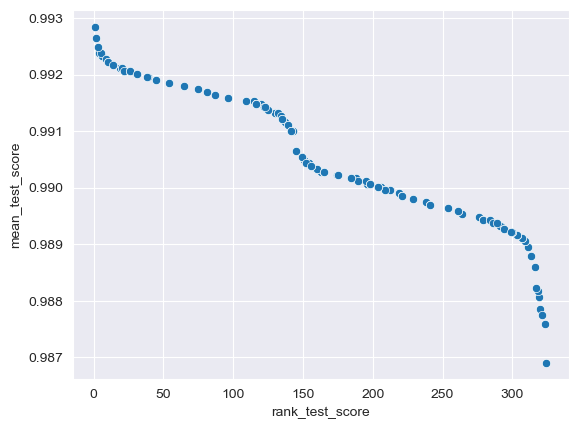

In [23]:
df = pd.DataFrame(gcvs['svc'].cv_results_)
sns.scatterplot(x='rank_test_score', y='mean_test_score', data=df)

In [103]:

param_grids['svc_nmf'] = {}
param_grids['svc_nmf']['vectorizing__title__lowercase'] = [True, False]
param_grids['svc_nmf']['vectorizing__title__max_features'] = [150,175, 200]
param_grids['svc_nmf']['vectorizing__text__max_features'] = [125, 150, 175]
param_grids['svc_nmf']['vectorizing__title__ngram_range'] = [(1,2), (1,1)]#[(1,3),(1, 2), (1,1)]
param_grids['svc_nmf']['vectorizing__text__ngram_range'] = [(1,1), (1,2)]#[(1,1),(1, 2), (1,3)]
param_grids['svc_nmf']['vectorizing__text__min_df'] = [1]#[2,3,4]
param_grids['svc_nmf']['vectorizing__title__min_df'] = [1]#[2,3,4]
param_grids['svc_nmf']['vectorizing__title__max_df'] =[.99]#[.99, .95]
param_grids['svc_nmf']['vectorizing__text__max_df'] = [.99]#[.99, .95]
param_grids['svc_nmf']['nmf__n_components'] = [None]#[None,80,160,200]
param_grids['svc_nmf']['svc__kernel'] = ['linear']#['linear', 'rbf']
param_grids['svc_nmf']['svc__C'] = [5, 6, 7]#[5,6,7]



In [104]:


gcvs['svc_nmf'] = GridSearchCV(pipelines['svc_nmf'],
                           param_grid=param_grids['svc_nmf'],
                           cv = 3, n_jobs = -1,
                           verbose = 100).fit(X_train50, y_train50)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


KeyboardInterrupt: 

In [82]:
gcvs['svc_nmf'].best_score_

np.float64(0.9946372239747635)

In [83]:
gcvs['svc_nmf'].score(X_test50, y_test50)

0.9955835962145111

In [84]:
gcvs['svc_nmf'].best_params_

{'nmf__n_components': None,
 'svc__C': 6,
 'svc__kernel': 'linear',
 'vectorizing__text__max_df': 0.99,
 'vectorizing__text__max_features': 175,
 'vectorizing__text__min_df': 1,
 'vectorizing__text__ngram_range': (1, 1),
 'vectorizing__title__lowercase': False,
 'vectorizing__title__max_df': 0.99,
 'vectorizing__title__max_features': 200,
 'vectorizing__title__min_df': 1,
 'vectorizing__title__ngram_range': (1, 1)}

<Axes: xlabel='rank_test_score', ylabel='mean_test_score'>

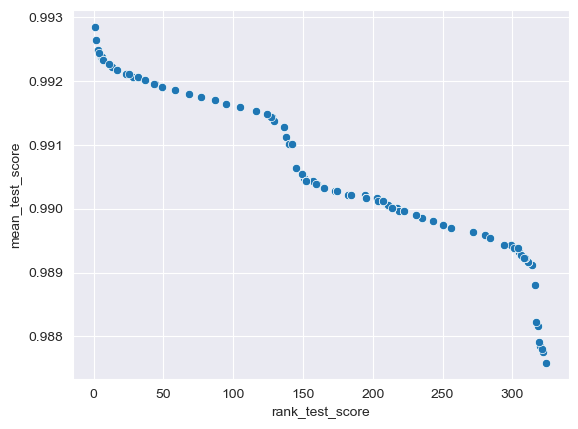

In [29]:

df = pd.DataFrame(gcvs['svc_nmf'].cv_results_)
sns.scatterplot(x='rank_test_score', y='mean_test_score', data=df)


In [99]:
param_grids['kmeans'] = {}
param_grids['kmeans']['vectorizing__title__lowercase'] = [True, False]
param_grids['kmeans']['vectorizing__title__max_features'] = [400, 500, 600]#[800, 1600]#[28,30, 32]
param_grids['kmeans']['vectorizing__text__max_features'] = [400, 500, 600]#[2,3,4]
param_grids['kmeans']['vectorizing__title__ngram_range'] = [(1,2), (1,3)]#[(1,1), (1,2), (1,3)]
param_grids['kmeans']['vectorizing__text__ngram_range'] = [(1,2),(1,3)]#[(1,4), (1,3)]
param_grids['kmeans']['vectorizing__text__min_df'] = [1,2]#[1,2]
param_grids['kmeans']['vectorizing__title__min_df'] = [1,2]#[5,4,3,2]
param_grids['kmeans']['vectorizing__text__max_df'] = [.99]#[.99, .98]
param_grids['kmeans']['vectorizing__title__max_df'] = [.99]#[.99, .98]#[5,4,3,2]
param_grids['kmeans']['pca__whiten'] = [False]
param_grids['kmeans']['pca__n_components'] = [None]#[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
param_grids['kmeans']['kmeans__n_init'] = [1]#[1,2,4]


In [100]:
gcvs['kmeans'] = GridSearchCV(pipelines['kmeans'],
                              param_grids['kmeans'],
                              cv = 3, n_jobs = -1,
                              verbose = 100).fit(X_train50, y_train50)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


KeyboardInterrupt: 

In [87]:
gcvs['kmeans'].best_score_

np.float64(0.9643007360672976)

In [88]:
gcvs['kmeans'].score(X_test50, y_test50)

Predicting...


C:\Users\theru\scoop\apps\anaconda3\current\App\envs\DS\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9639327024185068

In [89]:
gcvs['kmeans'].best_params_

{'kmeans__n_init': 1,
 'pca__n_components': None,
 'pca__whiten': False,
 'vectorizing__text__max_df': 0.99,
 'vectorizing__text__max_features': 600,
 'vectorizing__text__min_df': 1,
 'vectorizing__text__ngram_range': (1, 3),
 'vectorizing__title__lowercase': False,
 'vectorizing__title__max_df': 0.99,
 'vectorizing__title__max_features': 500,
 'vectorizing__title__min_df': 1,
 'vectorizing__title__ngram_range': (1, 3)}

<Axes: xlabel='rank_test_score', ylabel='mean_test_score'>

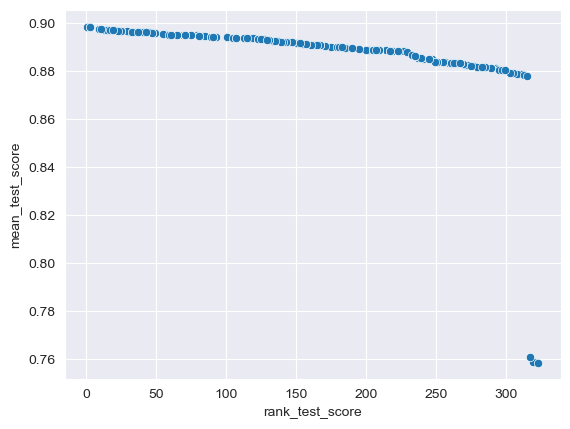

In [35]:
df = pd.DataFrame(gcvs['kmeans'].cv_results_)
sns.scatterplot(x='rank_test_score', y='mean_test_score', data=df)

In [95]:
param_grids['kmeans_nmf'] = {}
param_grids['kmeans_nmf']['vectorizing__title__lowercase'] = [True, False]
param_grids['kmeans_nmf']['vectorizing__title__max_features'] = [400, 500, 600]#[400,500,600]#[300,400,500]#[800, 1600]#[28,30, 32]
param_grids['kmeans_nmf']['vectorizing__text__max_features'] = [500, 600, 700]#[600, 700]#[550, 600, 650]#[2,3,4]
param_grids['kmeans_nmf']['vectorizing__title__ngram_range'] = [(1,1), (1,2)]#[(1,1), (1,2), (1,3)]
param_grids['kmeans_nmf']['vectorizing__text__ngram_range'] = [(1,2), (1,3)]#[(1,3), (1,2)]#[(1,4), (1,3)]
param_grids['kmeans_nmf']['vectorizing__text__min_df'] = [1]#[1,2]
param_grids['kmeans_nmf']['vectorizing__title__min_df'] = [1]#[5,4,3,2]
param_grids['kmeans_nmf']['vectorizing__text__max_df'] = [.99]#[.99, .98]
param_grids['kmeans_nmf']['vectorizing__title__max_df'] = [.99]#[.99, .98]#[5,4,3,2]
param_grids['kmeans_nmf']['nmf__max_iter'] = [1000]
param_grids['kmeans_nmf']['nmf__n_components'] = [8,10,12]#[2,4,8,10,12,14,16,18]#[10,11]#[11,12,13,14,15]#[50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
param_grids['kmeans_nmf']['nmf__random_state'] = [27]
param_grids['kmeans_nmf']['nmf__init'] = ['nndsvda']#['nndsvd', 'nndsvda']
param_grids['kmeans_nmf']['nmf__solver'] = ['cd']#['mu', 'cd']
param_grids['kmeans_nmf']['kmeans__random_state'] = [27]
param_grids['kmeans_nmf']['kmeans__init'] = ['k-means++']
param_grids['kmeans_nmf']['kmeans__n_init'] = [1]#[1,2,4]


In [96]:
gcvs['kmeans_nmf'] = GridSearchCV(pipelines['kmeans_nmf'],
                              param_grids['kmeans_nmf'],
                              cv = 5, n_jobs = 14,
                              verbose = 100).fit(X_train50, y_train50)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


KeyboardInterrupt: 

In [92]:
gcvs['kmeans_nmf'].best_score_

np.float64(0.9257623554153522)

In [93]:
gcvs['kmeans_nmf'].score(X_test50, y_test50)

Predicting...


C:\Users\theru\scoop\apps\anaconda3\current\App\envs\DS\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9199263932702418

In [94]:
gcvs['kmeans_nmf'].best_params_

{'kmeans__init': 'k-means++',
 'kmeans__n_init': 1,
 'kmeans__random_state': 27,
 'nmf__init': 'nndsvda',
 'nmf__max_iter': 1000,
 'nmf__n_components': 8,
 'nmf__random_state': 27,
 'nmf__solver': 'cd',
 'vectorizing__text__max_df': 0.99,
 'vectorizing__text__max_features': 600,
 'vectorizing__text__min_df': 1,
 'vectorizing__text__ngram_range': (1, 3),
 'vectorizing__title__lowercase': True,
 'vectorizing__title__max_df': 0.99,
 'vectorizing__title__max_features': 600,
 'vectorizing__title__min_df': 1,
 'vectorizing__title__ngram_range': (1, 1)}

<Axes: xlabel='rank_test_score', ylabel='mean_test_score'>

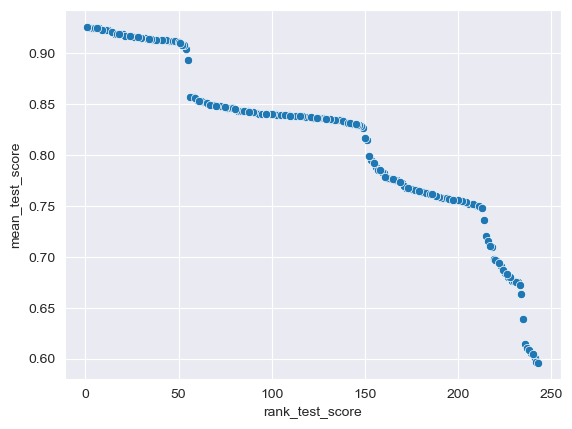

In [60]:
#dfkmnmf = df
df = pd.DataFrame(gcvs['kmeans_nmf'].cv_results_)
sns.scatterplot(x='rank_test_score', y='mean_test_score', data=df)
